In [234]:
import random

random.seed(321)

In [235]:
payment_table = {"Reward": 3,
                 "Sucker": 0,
                 "Temptation": 5,
                 "Punishment": 1}

In [236]:
class Agent:
    def __init__(self, wealth, name):
        self.history = {}
        self.initial_wealth = wealth
        self.current_wealth = self.initial_wealth
        self.decision = None
        self.name = name
        self.wealth_history = [self.initial_wealth]

    def make_decision(self, cost2play):
        next_game_selection = []
        for key, value in payment_table.items():
            if self.current_wealth+value-cost2play > 0:
                next_game_selection.append(key)

        #print('agent name:', self.name)
        #print("current wealth:", self.current_wealth)
        #print("selection:", next_game_selection)
        if len(next_game_selection) >= 4:
            #All outcomes would allow survival
            #print(">= 4")
            return "C" if random.random() < 0.75 else "D"
        elif len(next_game_selection) == 3:
            #This means that Temptation, Reward, and Punishment would allow survival. So defection guarantees survival.
            #print("==3")
            return "D"
        elif len(next_game_selection) == 2:
            #This means that Temptation and Reward would allow survival
            #print("==2")
            return "C" if random.random() < 0.5 else "D"
        elif len(next_game_selection) == 1:
            #This means the only option is Temptation, which is achieved only through defection
            #print("==1")
            return "D"
        else:
            #print("==0")
            return "D" 

    def receive_payment(self, outcome):
        self.current_wealth += payment_table[outcome]
        self.decision = outcome
    
    def update_history(self, opponent, outcome):
        if opponent in self.history:
            self.history[opponent].append(outcome)
        else:
            self.history[opponent] = [outcome]

    def update_wealth_history(self):
        self.wealth_history.append(self.current_wealth)

    def pay2play(self, cost):
        self.current_wealth = self.current_wealth-cost

In [237]:
class PD:
    def __init__(self):
        #self.cost2play = cost2play
        pass

    def play(self, agent_1, agent_2, cost2play):
        #print('Agent 1', agent_1.name)
        #print('Agent 2', agent_2.name)
        decision_1 = agent_1.make_decision(cost2play)
        decision_2 = agent_2.make_decision(cost2play)
        outcome_1, outcome_2 = self.calc_outcome(decision_1, decision_2)
        agent_1.receive_payment(outcome_1)
        agent_2.receive_payment(outcome_2)
        agent_1.update_history(agent_2.name, outcome_1)
        agent_2.update_history(agent_1.name, outcome_2)
        agent_1.pay2play(cost2play)
        agent_2.pay2play(cost2play)
        agent_1.update_wealth_history()
        agent_2.update_wealth_history()
        return outcome_1

    def calc_outcome(self, decision_1, decision_2):
        if decision_1+decision_2 == "CC":
            return "Reward", "Reward"
        elif decision_1+decision_2 == "DD":
            return "Punishment", "Punishment"
        elif decision_1+decision_2 == "CD":
            return "Sucker", "Temptation"
        elif decision_1+decision_2 == "DC":
            return "Temptation", "Sucker"

In [238]:
def update_payment_table(amount):
    additional = amount/2
    payment_table['Temptation'] += 0.8*additional
    payment_table['Reward'] += 0.8*additional

In [239]:
def run_game(agents, our_game, initial_cost):
    agent_indices = list(range(len(agents)))
    random.shuffle(agent_indices)

    number_of_rounds = int(len(agents)/2*(len(agents)-1))
    outcomes = []
    game_count = 0
    cost2play = initial_cost
    print(number_of_rounds)
    for i in range(number_of_rounds):
        top = agent_indices[:int(len(agent_indices)/2)]
        bottom = agent_indices[int(len(agent_indices)/2):]
        total = 0
        for idx, top_agent in enumerate(top):
            #print(agents[top_agent].name)
            #print(agents[bottom[idx]].name)
            if agents[top_agent].current_wealth > 0 and agents[bottom[idx]].current_wealth > 0:
                outcome = our_game.play(agents[top_agent], agents[bottom[idx]], cost2play)
                outcomes.append(outcome+"_round_"+str(i))
                total += payment_table[agent.decision]
                game_count += 1
        agent_indices = agent_indices[0:1]+agent_indices[-1:]+agent_indices[1:-1]
        #print(total)
        amount = total/len(agents)
        #print(amount)
        #print("new cost2play:", cost2play)
        #print(amount)
        update_payment_table(amount)
        #print(payment_table)
    return outcomes, game_count

In [240]:
def create_agents(split):
    agents = []
    for i in range(split[0]):
        agents.append(Agent(1,"low_"+str(i)))
    for i in range(split[1]):
        agents.append(Agent(2, "mid_low_"+str(i)))
    for i in range(split[2]):
        agents.append(Agent(3, "mid_high_"+str(i)))
    for i in range(split[3]):
        agents.append(Agent(5, "high_"+str(i)))
    return agents

In [241]:
agents = create_agents([50,0,0,50])

In [242]:
game = PD()

In [243]:
outcomes, game_count = run_game(agents,game,2)

4950


In [ ]:
int(len(agents)/2*(len(agents)-1))

In [163]:
outcomes

['Sucker_round_0',
 'Temptation_round_0',
 'Punishment_round_0',
 'Sucker_round_0',
 'Punishment_round_0',
 'Sucker_round_0',
 'Sucker_round_0',
 'Punishment_round_0',
 'Punishment_round_0',
 'Punishment_round_0',
 'Temptation_round_1',
 'Temptation_round_1',
 'Sucker_round_1',
 'Sucker_round_2',
 'Reward_round_3',
 'Reward_round_4',
 'Reward_round_5',
 'Sucker_round_6',
 'Temptation_round_7',
 'Temptation_round_7',
 'Reward_round_8',
 'Sucker_round_8',
 'Temptation_round_9',
 'Reward_round_9',
 'Reward_round_10',
 'Punishment_round_10',
 'Sucker_round_11',
 'Reward_round_11',
 'Reward_round_12',
 'Punishment_round_12',
 'Reward_round_13',
 'Temptation_round_13',
 'Temptation_round_14',
 'Reward_round_15',
 'Reward_round_16',
 'Reward_round_17',
 'Temptation_round_18',
 'Temptation_round_20',
 'Sucker_round_21',
 'Sucker_round_22',
 'Sucker_round_23',
 'Temptation_round_24',
 'Temptation_round_25',
 'Reward_round_26',
 'Sucker_round_27',
 'Reward_round_28',
 'Reward_round_29',
 'Reward

In [244]:
rounds = 4950
r_count = [0]*rounds
p_count = [0]*rounds
ts_count = [0]*rounds
for outcome in outcomes:
    for i in range(rounds):
        if outcome.endswith("_"+str(i)):
            if outcome.startswith('Reward'):
                r_count[i] += 1
            elif outcome.startswith('Punishment'):
                p_count[i] += 1
            else:
                ts_count[i] += 1
print(r_count)
print(p_count)
print(ts_count)

[16, 9, 13, 12, 14, 15, 14, 16, 21, 16, 14, 21, 19, 17, 16, 10, 13, 16, 11, 16, 18, 15, 13, 15, 19, 13, 13, 13, 18, 16, 12, 16, 19, 16, 13, 10, 15, 16, 11, 16, 9, 13, 15, 13, 12, 13, 16, 15, 15, 16, 19, 19, 15, 18, 11, 11, 15, 15, 12, 14, 11, 13, 10, 11, 11, 16, 15, 13, 13, 13, 13, 18, 16, 18, 14, 13, 11, 17, 17, 15, 13, 15, 17, 11, 15, 12, 15, 17, 16, 19, 16, 15, 17, 20, 13, 17, 16, 14, 17, 16, 11, 16, 17, 17, 14, 14, 17, 17, 19, 14, 12, 17, 14, 12, 17, 11, 21, 16, 20, 17, 18, 15, 14, 14, 13, 13, 14, 12, 12, 11, 12, 16, 15, 15, 10, 11, 14, 18, 14, 14, 13, 13, 12, 15, 10, 16, 14, 10, 11, 12, 17, 13, 14, 16, 13, 17, 13, 15, 12, 20, 14, 16, 11, 15, 14, 13, 11, 14, 17, 13, 14, 18, 13, 17, 13, 17, 17, 17, 14, 14, 13, 16, 16, 15, 16, 13, 13, 15, 11, 15, 17, 16, 14, 18, 18, 12, 18, 14, 12, 15, 18, 12, 15, 16, 17, 17, 14, 15, 16, 17, 15, 20, 18, 18, 18, 18, 16, 16, 15, 18, 18, 11, 15, 11, 13, 15, 13, 13, 14, 18, 15, 12, 15, 19, 20, 9, 17, 10, 15, 15, 15, 17, 14, 21, 13, 17, 13, 16, 13, 19, 12

In [199]:
import matplotlib.pyplot as plt

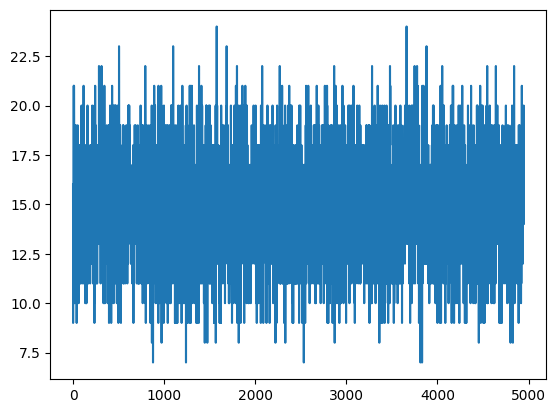

In [245]:
plt.plot(r_count)

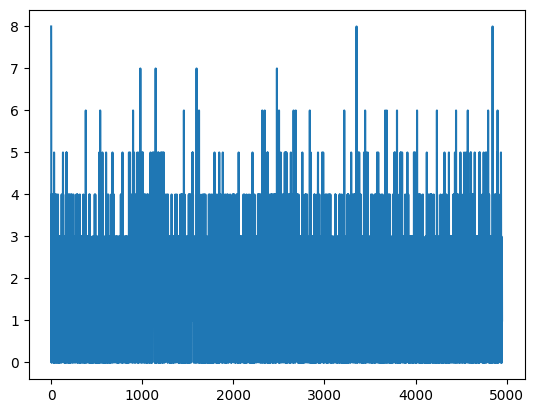

In [246]:
plt.plot(p_count)

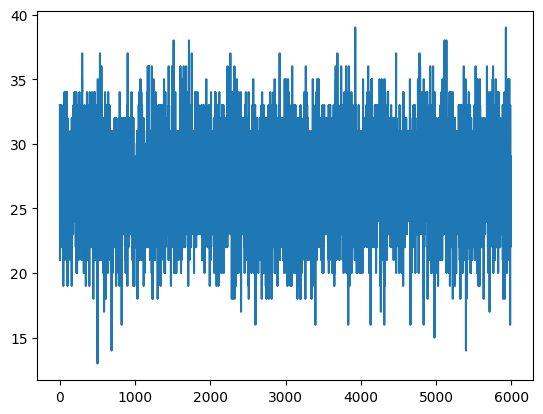

In [212]:
plt.plot(r_count)

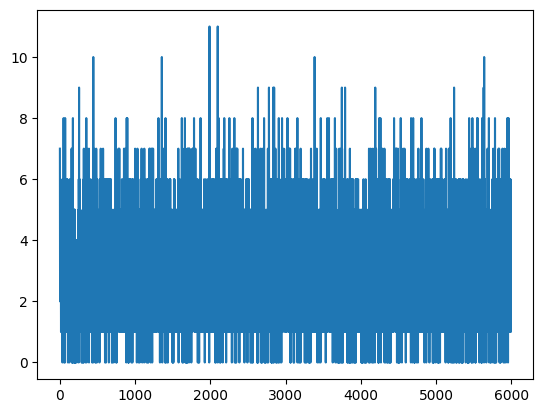

In [213]:
plt.plot(p_count)

In [ ]:
plt.plot(r_count)

In [ ]:
plt.plot(p_count)

In [ ]:
plt.plot(ts_count)

In [54]:
for agent in agents:
    if agent.current_wealth <= 0:
        print(agent.name)

low_0
low_1
low_2
low_3
low_4
low_5
low_6
low_9


In [ ]:
total = 0
for agent in agents:
    total += agent.current_wealth
print(total/len(agents))

On a round:
    agent makes a choice based on payoff
    agent pays the cost to play the game
    the value in the system is used to determine the payoff amounts


Example:

Agent A - initial wealth = 2
Agent B - initial wealth = 4

cost2play = 2

Total amount paid is 4
Prisoner's dilemma 
T - 2
R - 1.33
P - 0.66
S - 0

Agent A - D
Agent B - C

Total 2

Agent A - C
Agent B - C

Total 2.66


Average income across all players